In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [4]:
df=pd.read_csv('E:\DATA SCIENCE\CODES and DOCS\DOCS\Add_sales_data_2018.csv')
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [5]:
df.shape

(205, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

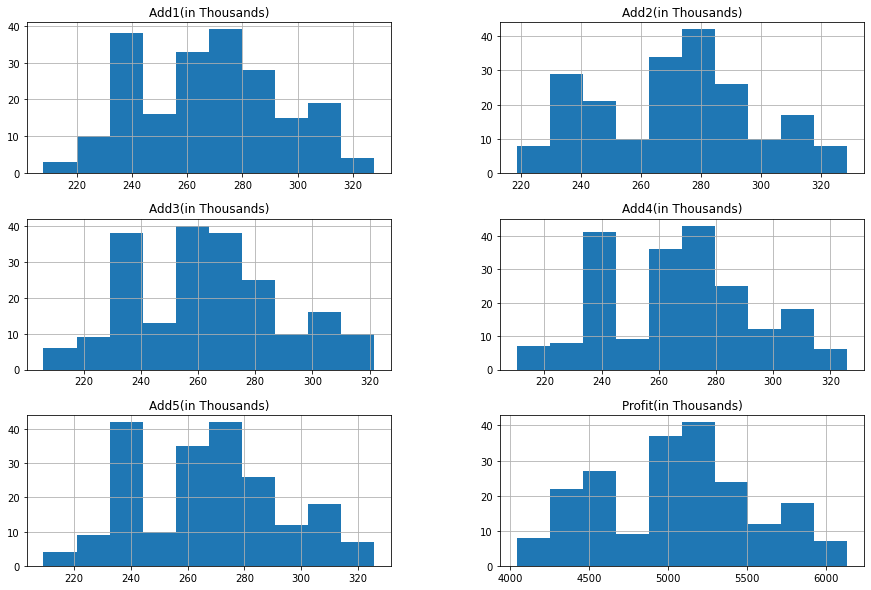

In [8]:

df.hist(figsize=(15,10))
plt.show()

# check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


<AxesSubplot:>

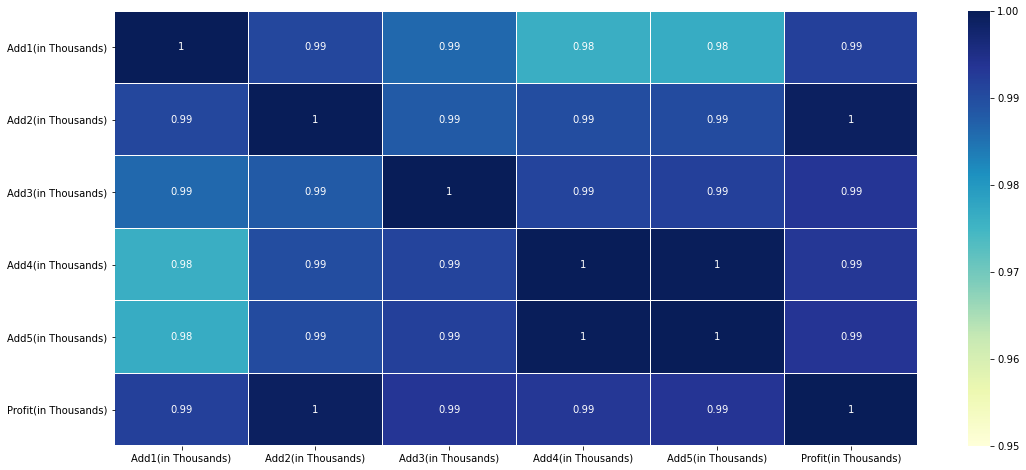

In [9]:
corrr=df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corrr,vmin=0.95,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [10]:
#profit have strong correlation with amount spend on adds.  Among them strongest is Add2

# Build a regression model to predict the profit from the given data and  comment your findings on it.

In [11]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [24]:
#dropiing Add4 since it have very strong correlatiion with Add5
df1=df.drop(['Add4(in Thousands)'],axis=1)
df1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [25]:
y=df1['Profit(in Thousands)']
x=df1.drop(['Profit(in Thousands)','Date'],axis=1)
x.shape

(205, 4)

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions= model.predict(x_test)

In [27]:
y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64

In [36]:
predictions

array([4153.2818461 , 4445.71740853, 5130.40796973, 4906.50501468,
       5006.82541736, 4623.35932117, 5384.57472057, 5328.09443997,
       5174.24658393, 5956.1665879 , 5780.67583526, 4998.63516679,
       5075.71943506, 5783.16863071, 4936.48878199, 5065.32451176,
       4190.86807497, 5034.91448533, 5013.72184751, 5134.46264443,
       5145.26899938, 5422.49401202, 4569.02583391, 4597.91098638,
       4436.70089824, 4175.21159561, 5616.18272777, 5667.26166773,
       4648.94682499, 5717.83356248, 5000.53038317, 5182.27013601,
       5017.70581515, 5545.23999615, 5013.74154448, 5033.29021927,
       5108.65226131, 4760.01597517, 4604.87740278, 4925.60547473,
       5252.35396509, 5038.53361181, 5491.86800825, 5019.16609419,
       4646.96844429, 4486.3807748 , 4433.99207865, 5300.48558185,
       5425.32966516, 4482.14603852, 4193.23839733, 6061.20029357])

In [38]:
print('mean squared error when all independant variables are considered is %0.3f '%(mean_squared_error(predictions,y_test)))

mean squared error when all independant variables are considered is 0.759 


In [33]:
avg=[]
for i in range(0,len(y_test)):
    avg.append(np.average(y_test))
avgArray=np.array(avg)
avgArray
    


array([5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625, 5022.08625, 5022.08625, 5022.08625,
       5022.08625, 5022.08625])

In [39]:
print('mean squared error when independant variables are NOT considered is %0.3f '%(mean_squared_error(avgArray,y_test)))

mean squared error when independant variables are NOT considered is 215055.449 


In [43]:
#SInce MEAN SQUARED ERROR when considering Independent Variables are way more less than that of NOT considering any independent 
#variables, Add variables can explain 99% of variablility in Profit
#Since Mean squared error is very low, predicted values are almost perfect and prediction is reliable

# Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [48]:
x_test.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
15,216.35,223.70,212.65,222.65
9,233.55,239.20,230.75,233.30
100,280.00,281.35,251.85,255.90
132,258.05,263.50,253.70,262.20
68,265.10,268.40,261.20,265.60


In [52]:
addData={'Add1(in Thousands)':[219],
         'Add2(in Thousands)':[312],
         'Add3(in Thousands)':[309],
         'Add5(in Thousands)':[320]
}

In [53]:
data=pd.DataFrame(addData)
data

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
0,219,312,309,320


In [54]:
predictions1= model.predict(data)

In [56]:
predictions1

array([5771.1136929])

In [57]:
print('profit generated by the values in data is ',predictions1[0])

profit generated by the values in data is  5771.113692896545
